<a href="https://colab.research.google.com/github/atilaSScastro/biblioteca_pandas/blob/main/Desafio_Mat%C3%A9ria_04_Modelo_de_Regress%C3%A3o_Atila_Silva_Santana_Castro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Instalação de bibliotecas necessárias para análise, visualização e estruturação do modelo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%pip install plotly
%pip install cufflinks
%pip install chart_studio

import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Carregamento do dataset
bd_mkt = pd.read_csv('MKT.csv')

# Exibição das primeiras linhas do dataset para inspeção inicial
bd_mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [8]:
# Informações gerais sobre o dataset, como número de entradas e tipos de dados
bd_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [9]:
# Estatísticas descritivas transpostas para melhor visualização
bd_mkt.describe().T

,count,mean,std,min,25%,50%,75%,max
youtube,171.0,178.021053,102.449597,0.84,91.08,179.76,262.98,355.68
facebook,171.0,27.671579,17.913532,0.00,11.70,26.76,43.68,59.52
newspaper,171.0,35.240000,24.902918,0.36,13.74,31.08,50.88,121.08
sales,171.0,16.922807,6.314608,1.92,12.54,15.48,20.82,32.40


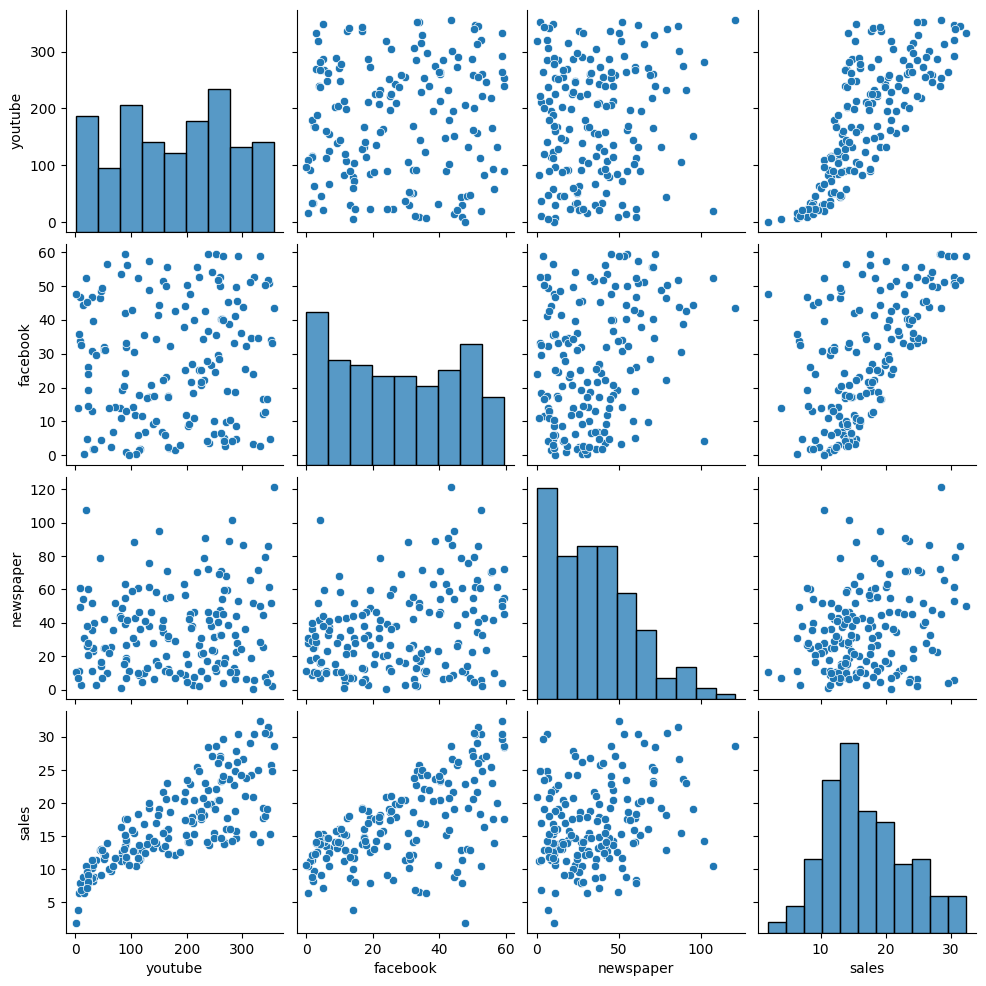

In [10]:
# Análise Exploratória de Dados

# Pairplot para visualizar relações entre todas as variáveis

sns.pairplot(bd_mkt)

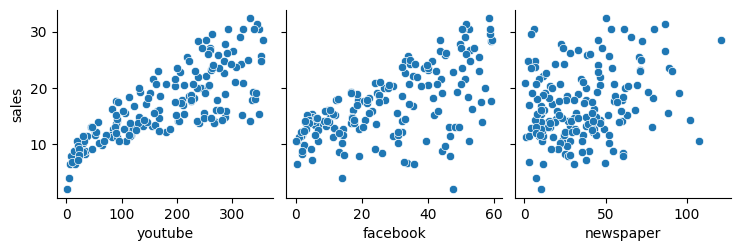

In [11]:
# Pairplot específico para 'youtube', 'facebook', 'newspaper' x 'sales'

sns.pairplot(bd_mkt, x_vars = ['youtube', 'facebook', 'newspaper'], y_vars = 'sales')

In [12]:
# Box plot para visualizar a distribuição das variáveis

px.box(bd_mkt)

In [13]:
# Cálculo da matriz de correlação para analisar relações entre variáveis

bd_mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


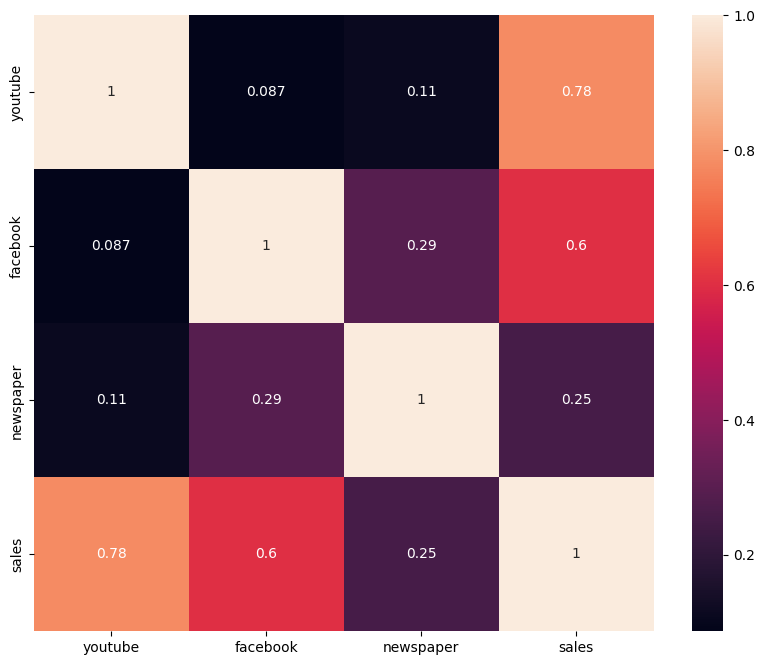

In [38]:
# Mapa de calor da matriz de correlação com anotações

plt.figure(figsize=(10, 8))
sns.heatmap(bd_mkt.corr(), annot=True)
plt.show()


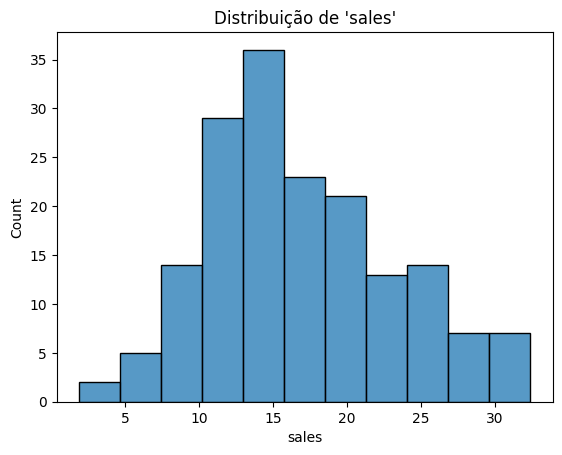

In [40]:
# Histograma da variável 'sales' para analisar a distribuição

sns.histplot(bd_mkt['sales'])
plt.title("Distribuição de 'sales'")
plt.show()

In [19]:
bd_mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [20]:
# Preparação dos dados para modelagem

# Separação das variáveis independentes (X) e dependente (Y)
X = bd_mkt[['youtube', 'facebook', 'newspaper']]
Y = bd_mkt[['sales']]

In [26]:
# Importação do método de divisão de dados do scikit-learn

from sklearn.model_selection import train_test_split

# Divisão dos dados em conjuntos de treino e teste (70% treino, 30% teste)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

In [27]:
# Exibição das dimensões dos conjuntos de treino e teste

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [28]:
# Importação do modelo de regressão linear do scikit-learn

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
# Treinamento do modelo de regressão linear com os dados de treino

lr.fit(X_train, Y_train)

LinearRegression()

In [30]:
# Previsão dos valores de vendas no conjunto de teste

Y_pred = lr.predict(X_test)

In [31]:
# Importação da métrica de R² para avaliação do modelo

from sklearn.metrics import r2_score

In [44]:
# Cálculo e exibição do coeficiente de determinação (R²) do modelo

r2 = r2_score(Y_test, Y_pred)
print(f'r2: {r2:.2f}')

r2: 0.88


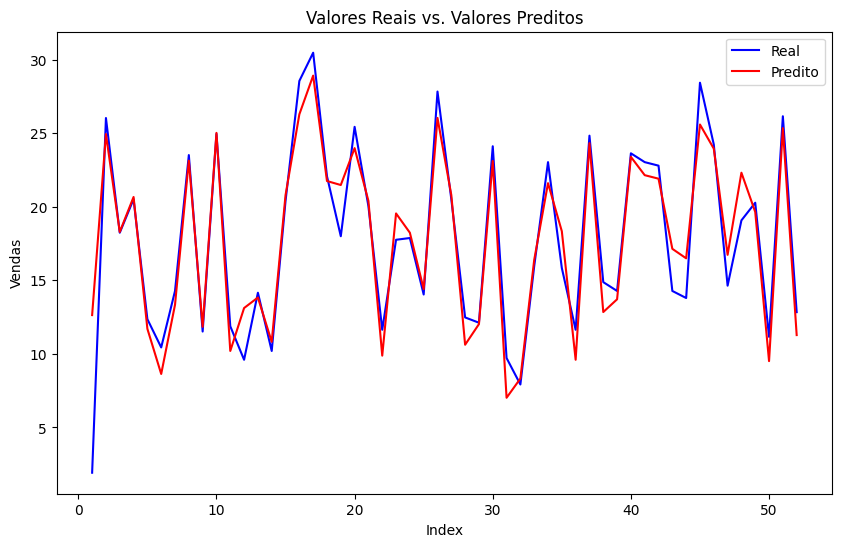

In [46]:
# Criação de uma lista de índices para os dados de teste
c = [i for i in range(1, len(X_test)+1,1)]

# Plotagem dos valores reais e previstos de vendas para visualização do desempenho do modelo
plt.figure(figsize=(10, 6))
plt.plot(c, Y_test, color='blue', label='Real')
plt.plot(c, Y_pred, color='red', label='Predito')
plt.xlabel('Index')
plt.ylabel('Vendas')
plt.title('Valores Reais vs. Valores Preditos')
plt.legend()
plt.show()